First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    

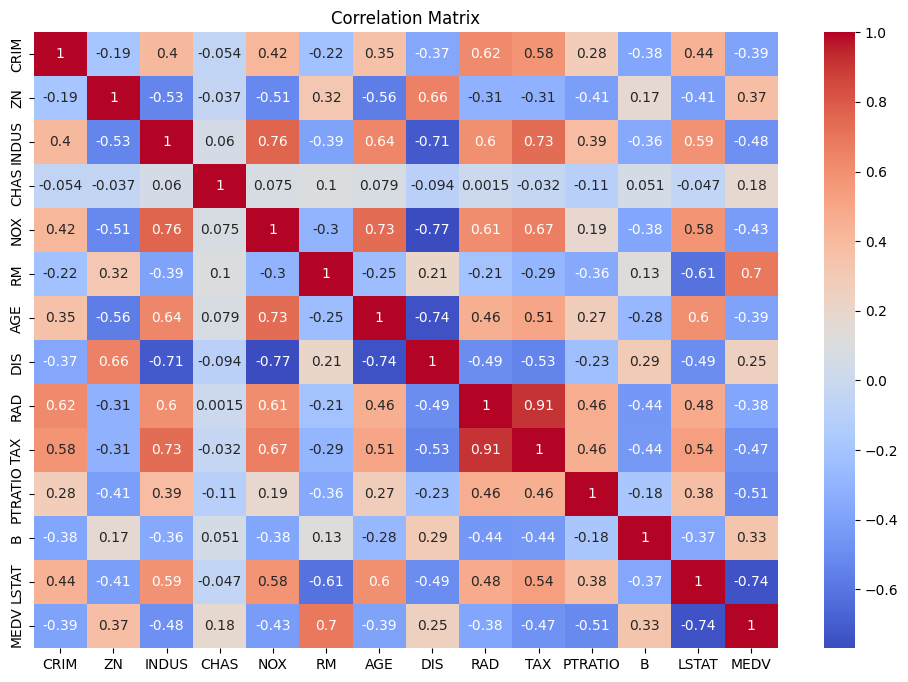


Mean Squared Error: 25.02
R^2 Score: 0.66


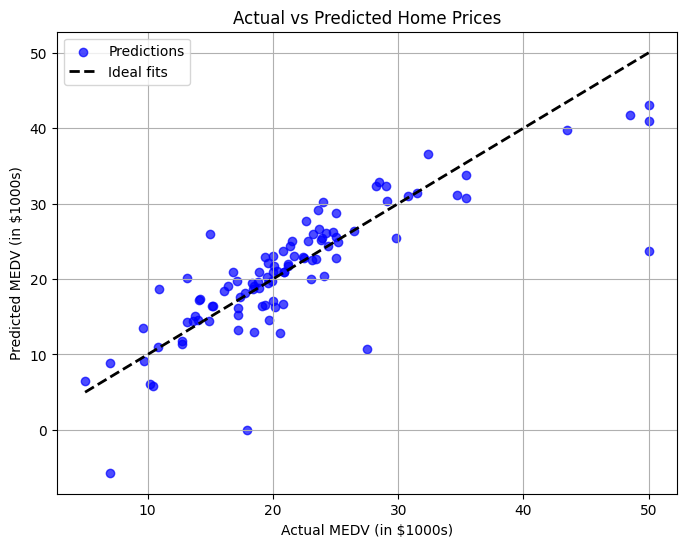

In [1]:
# Lab 4: Data Analytics I - Linear Regression on Boston Housing Data

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the Dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\archive (2)\HousingData.csv')
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Explore Dataset
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Step 4: Check and Handle Missing Values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Impute missing values with column means
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(df.drop('MEDV', axis=1)), columns=df.columns[:-1])
y = df['MEDV']

# Step 5: Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 6: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 9: Plot Actual vs Predicted Values (with explanation)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal fits')

# Labels and Title
plt.xlabel("Actual MEDV (in $1000s)")
plt.ylabel("Predicted MEDV (in $1000s)")
plt.title("Actual vs Predicted Home Prices")

# Add legend
plt.legend()

# Grid for better readability
plt.grid(True)

plt.show()

